In [26]:
from ising_model import ClassicIsing
import electron
from grid import Grid, HoleGrid, Mobius, Cylinder, Torus
import matplotlib.pyplot as plt
import numpy as np

In [27]:
def B_vs_T(grid, temps, mc_steps, runs_per_T, J = 1):

    # for each temperature, perform simulation and record magnetization
    magnetizations = []
    for T in temps:
        isingModel = ClassicIsing(grid, temperature=T, ferromagnetivity=J,Mf_External=0)

        # perform equilibration and measurement runs multiple times to average
        total_mag = 0
        for run in range(runs_per_T):
            isingModel.runSimulation(mc_steps)
            total_mag += isingModel.magnetization()

        # average magnetization for this temperature and record it
        avg_mag = total_mag / runs_per_T
        magnetizations.append(avg_mag)
        #print(f"T={T:.2f}, <|M|>={magnetizations[-1]:.3f}")

        # reset the grid for the next temperature
        isingModel.resetSimulation()

    return magnetizations


Equilibrator

In [28]:
def equilibrate_grid(grid, tolerance=1e-1, full_hist = False, J=1):
    """run the simulation until the grid equilibrates. That is, until the mean magnetization in the low temp regime
    stops changing significantly"""

    max_steps = grid.n_x * 10  # arbitrary large number of steps to prevent infinite loops

    temps = np.linspace(1, 1.2, 10)
    models = []
    for T in temps:
        model = ClassicIsing(grid, temperature=T, ferromagnetivity=J, Mf_External=0)
        models.append(model)
    
    if full_hist:
        total_hist = []

    avg_mags_hist = []
    for step in range(max_steps):
        mags = []
        for model in models:
            model.runSimulation(1)
            mags.append(model.magnetization())
        avg_mags = np.mean(mags)
        if full_hist:
            total_hist.append(avg_mags)
        avg_mags_hist.append(avg_mags)
        if step > 0:
            # check past 5 steps for equilibration by how much the average magnetization has changed
            if np.all(np.abs(avg_mags_hist[-5:] - avg_mags) < tolerance):
                print(f"Equilibrated after {step} steps.")
                return total_hist if full_hist else None

    print("Reached maximum steps without equilibration.")
    return total_hist if full_hist else None


Equilibrated after 117 steps.


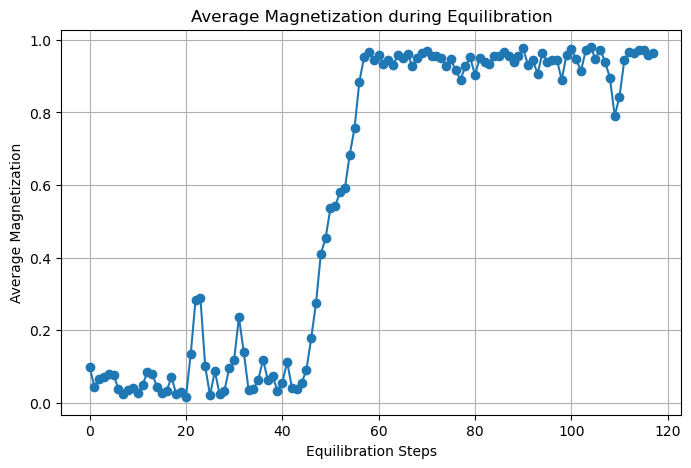

In [20]:
N = 20            # Lattice size
J = 1           # Coupling constant
grid = Grid(n_x=N, n_y=N, gridPointObject=electron.ClassicElectron)
mags = equilibrate_grid(grid, tolerance=1e-2, full_hist=True, J=J)

# plot the mean magnetization over time
plt.figure(figsize=(8, 5))
plt.plot(mags, marker='o')
plt.xlabel('Equilibration Steps')
plt.ylabel('Average Magnetization')
plt.title('Average Magnetization during Equilibration')
plt.grid()
plt.show()

Normal Grid Temperature vs Average Absolute Magnetization

Equilibrated after 117 steps.


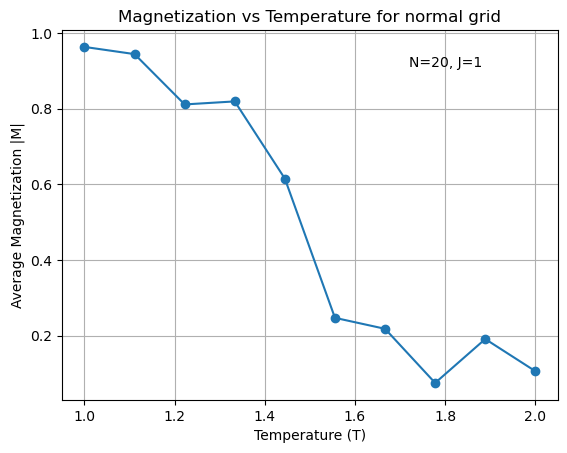

In [30]:
# --- Parameters ---
N = 20              # Lattice size
J = 1                          # Coupling constant
temps = np.linspace(1, 2, 10)  # Temperature range
mc_steps = 200                   # sweeps for measurement
runs_per_T = 5                 # Average over multiple runs
# ------------------

basic_grid = Grid(n_x=N, n_y=N, gridPointObject=electron.ClassicElectron)
equilibrate_grid(basic_grid, tolerance=1e-2, full_hist=False, J=J)
mags = B_vs_T(basic_grid, temps, mc_steps, runs_per_T)



# graphing the results
plt.plot(temps, mags, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization |M|')
plt.title('Magnetization vs Temperature for normal grid')
plt.text(0.7, 0.9, f'N={N}, J={J}', transform=plt.gca().transAxes)
#plt.legend()
plt.grid()
plt.show()

Grid with Hole Temperature vs Average Absolute Magnetization (UPDATE!)

In [ ]:
# --- Parameters ---
N = 10            # Lattice size
J = 1            # Coupling constant
temps = np.linspace(1, 3.5, 30)  # Temperature range
eq_steps = 20  # Steps for equilibration
mc_steps = 30  # Steps for measurement
runs_per_T = 10    # Average over multiple runs

holeGrid = HoleGrid(n_x=10, n_y=10, gridPointObject=electron.ClassicElectron, random_seed=2, hole_grid=np.ones((3,3)) ,c_y=2, c_x=2)

isingModel = ClassicIsing(holeGrid, temperature=temps[0], ferromagnetivity=J,Mf_External=0)

def B_vs_T(temps, eq_steps, mc_steps, runs_per_T):
    magnetizations = []
    for T in temps:
        holeGrid = HoleGrid(n_x= N, n_y=N, gridPointObject=electron.ClassicElectron, random_seed=2, hole_grid=np.ones((3,3)) ,c_y=5, c_x=5)

        isingModel.grid = holeGrid
        isingModel.temperature = T
        total_mag = 0
        for run in range(runs_per_T):
            #equilibration
            isingModel.runSimulation(eq_steps)
            #measurement
            isingModel.runSimulation(mc_steps)
            # calculate magnetization
            total_mag += isingModel.magnetization()
        avg_mag = total_mag / runs_per_T
        magnetizations.append(avg_mag)
        print(f"T={T:.2f}, <|M|>={magnetizations[-1]:.3f}")
    return magnetizations

mags = B_vs_T(temps, eq_steps, mc_steps, runs_per_T)

# graphing the results
plt.plot(temps, mags, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization |M|')
plt.title('Magnetization vs Temperature for normal grid')
plt.text(0.7, 0.9, f'N={N}, J={J}', transform=plt.gca().transAxes)
#plt.legend()
plt.grid()
plt.show()

In [ ]:
# --- Parameters ---
N = 20            # Lattice size
J = 1            # Coupling constant
temps = np.linspace(1, 3.5, 30)  # Temperature range
eq_steps = 20  # Steps for equilibration
mc_steps = 30  # Steps for measurement
runs_per_T = 30    # Average over multiple runs

mobiusGrid = Mobius(n_x=10, n_y=10, gridPointObject=electron.ClassicElectron, random_seed=2)

isingModel = ClassicIsing(mobiusGrid, temperature=temps[0], ferromagnetivity=J,Mf_External=0)

def B_vs_T(temps, eq_steps, mc_steps, runs_per_T):
    magnetizations = []
    for T in temps:
        mobiusGrid = Mobius(n_x=10, n_y=10, gridPointObject=electron.ClassicElectron, random_seed=2)


        isingModel.grid = mobiusGrid
        isingModel.temperature = T
        total_mag = 0
        for run in range(runs_per_T):
            #equilibration
            isingModel.runSimulation(eq_steps)
            #measurement
            isingModel.runSimulation(mc_steps)
            # calculate magnetization
            total_mag += isingModel.magnetization()
        avg_mag = total_mag / runs_per_T
        magnetizations.append(avg_mag)
        print(f"T={T:.2f}, <|M|>={magnetizations[-1]:.3f}")
    return magnetizations

mags = B_vs_T(temps, eq_steps, mc_steps, runs_per_T)

# graphing the results
plt.plot(temps, mags, marker='o')
plt.xlabel('Temperature (T)')
plt.ylabel('Average Magnetization |M|')
plt.title('Magnetization vs Temperature for normal grid')
plt.text(0.7, 0.9, f'N={N}, J={J}', transform=plt.gca().transAxes)
#plt.legend()
plt.grid()
plt.show()